In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")
import json
import requests
from pandas.io.json import json_normalize
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("This will not show")

%matplotlib inline

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows',2000)
#pd.set_option('display.max_info_rows', 10)
#pd.set_option('display.max_colwidth', 100)
#pd.set_option('display.max_info_columns', 5000)
#pd.set_option('display.expand_frame_repr', True)
#pd.set_option('display.width', 10)

In [2]:
df = pd.read_csv('scout_car_filled_data_finished.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,...,15844,15845,15846,15847,15848,15849,15850,15851,15852,15853,15854,15855,15856,15857,15858,15859,15860,15861,15862,15863,15864,15865,15866,15867,15868,15869,15870,15871,15872,15873,15874,15875,15876,15877,15878,15879,15880,15881,15882,15883,15884,15885,15886,15887,15888,15889,15890,15891,15892,15893,15894,15895,15896,15897,15898,15899,15900,15901,15902,15903,15904,15905,15906,15907,15908,15909,15910,15911,15912,15913,15914,15915,15916,15917,15918
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1,...,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace,Renault Espace
body_type,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Station wagon,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Compact,Compact,Sedans,Compact,Sedans,Sedans,Compact,Sedans,Sedans,Sedans,Compact,Compact,Compact,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Compact,Compact,Compact,Sedans,Sedans,Compact,Compact,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Compact,Compact,Sedans,Sedans,Sedans,Sedans,Sedans,Compact,Sedans,Sedans,Compact,...,Van,Van,Van,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Sedans,Van,Van,Van,Station wagon,Van,Van,Station wagon,Van,Station wagon,Station wagon,Van,Van,Van,Van,Station wagon,Van,Van,Van,Van,Van,Van,Sedans,Van,Station wagon,Compact,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van,Van
price,15770,14500,14640,14500,16790,15090,16422,14480,16700,17990,18500,17990,18380,18399,17990,18700,18900,18500,18400,18500,18500,18500,18900,18850,18500,8999,11444,11300,18900,11290,11290,11440,11445,11700,11900,11949,11890,11600,11900,11630,11880,11800,11850,11569,11490,11490,11500,11790,11490,11470,11480,11180,11450,11100,10900,10999,10900,10950,10800,10600,10800,9950,10300,10000,10490,18900,18900,18900,18900,18890,18890,18890,18880,18880,18880,...,46666,46660,46490,45990,46130,45990,45890,45490,44999,43950,43911,43899,43890,43990,43800,43790,43545,43490,43490,43490,43315,43490,43080,49490,49690,49100,48990,

In [3]:
def fill(df, group_col1, group_col2, col_name, method): # method can be "mode" or "median" or "ffill"
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].median())
                
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

# km

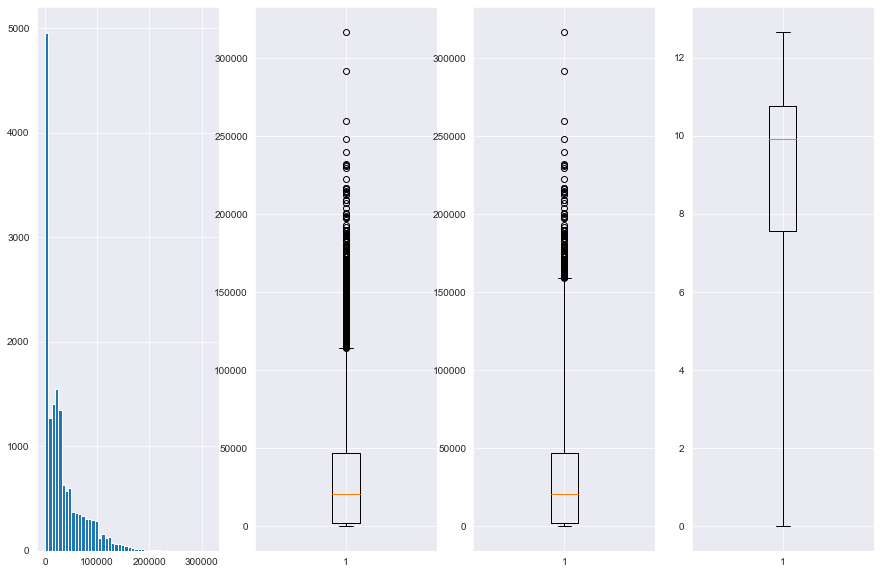

In [4]:
plt.figure(figsize=(15,10))
plt.subplot(141)
plt.hist(df.km, bins = 50)

plt.subplot(142)
plt.boxplot(df.km)

plt.subplot(143)
plt.boxplot(df.km, whis = 2.5)

plt.subplot(144)
plt.boxplot(np.log(df.km), whis = 2.5)
plt.show()

# Cons_Comb

In [5]:
df.Cons_Comb.describe()

count    15919.000000
mean         4.834550
std          0.899448
min          3.000000
25%          4.100000
50%          4.800000
75%          5.400000
max          9.100000
Name: Cons_Comb, dtype: float64

In [6]:
df.Cons_Comb.sort_values().head(10)

6241    3.0
4281    3.0
4282    3.0
53      3.0
8020    3.0
2885    3.0
8762    3.0
8805    3.0
412     3.0
8731    3.0
Name: Cons_Comb, dtype: float64

In [7]:
df.Cons_Comb.sort_values().tail(10)

12553    8.6
12422    8.6
12571    8.6
12530    8.6
10789    8.6
12529    8.7
10819    8.7
12054    8.7
10817    8.7
10771    9.1
Name: Cons_Comb, dtype: float64

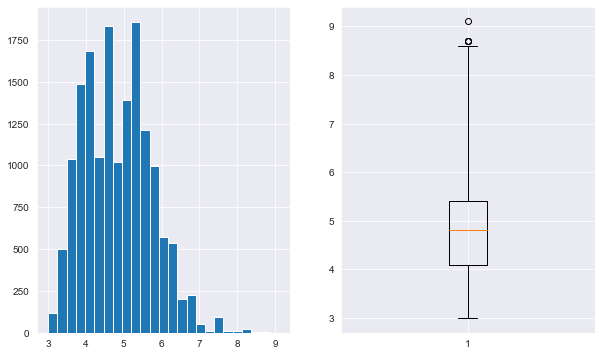

In [8]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.Cons_Comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.Cons_Comb, whis = 2.5)

plt.show()

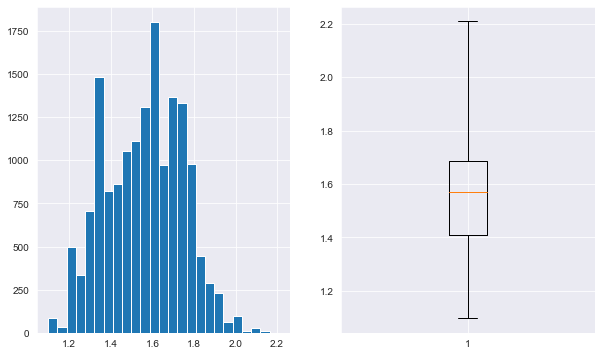

In [10]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(np.log(df.Cons_Comb), bins = 25)

plt.subplot(122)
plt.boxplot(np.log(df.Cons_Comb), whis = 2)

plt.show()

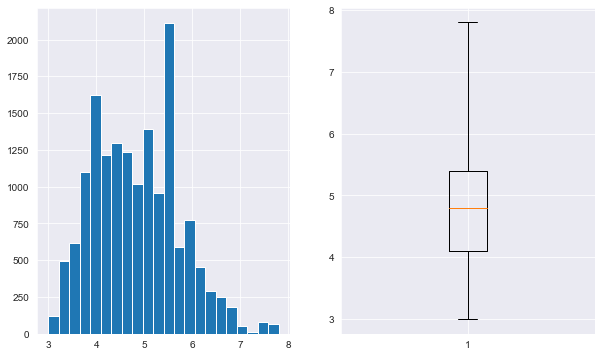

In [13]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(winsorize(df.Cons_Comb, (0.003)), bins = 22)

plt.subplot(122)
plt.boxplot(winsorize(df.Cons_Comb, (0.003)), whis = 2)

plt.show()

# Displacement_cc      

In [14]:
df.Displacement_cc.describe()

count    15919.000000
mean      1425.609335
std        329.720022
min          1.000000
25%       1229.000000
50%       1461.000000
75%       1598.000000
max      16000.000000
Name: Displacement_cc, dtype: float64

In [15]:
df.sort_values(by = ["Displacement_cc"], ascending = False)["Displacement_cc"].head(55)

10932    16000.0
7169     15898.0
10771     2967.0
3595      2480.0
3587      2480.0
3649      2480.0
3590      2480.0
3599      2480.0
3598      2480.0
3596      2480.0
3600      2480.0
3601      2480.0
3610      2480.0
3609      2480.0
3608      2480.0
3606      2480.0
3605      2480.0
3648      2480.0
3592      2480.0
3593      2480.0
3602      2480.0
3604      2480.0
3603      2480.0
12176     2000.0
12462     2000.0
12521     2000.0
12170     2000.0
13027     2000.0
11929     2000.0
12179     2000.0
11935     2000.0
12181     2000.0
11800     2000.0
4188      2000.0
12526     2000.0
12959     2000.0
12527     2000.0
11977     2000.0
12469     2000.0
12520     2000.0
12464     2000.0
12265     2000.0
11870     2000.0
10556     2000.0
2903      2000.0
15197     2000.0
12414     2000.0
11988     2000.0
13050     2000.0
12412     2000.0
10464     2000.0
12560     2000.0
12411     2000.0
11032     2000.0
13054     2000.0
Name: Displacement_cc, dtype: float64

In [16]:
df.sort_values(by = ["Displacement_cc"], ascending = True)["Displacement_cc"].head(55)

12790      1.0
14319      1.0
14315      1.0
12849      1.0
12848      1.0
12835      1.0
12823      1.0
12815      1.0
12800      1.0
12798      1.0
12796      1.0
12786      1.0
12783      1.0
12781      1.0
12769      1.0
12768      1.0
12750      1.0
12670      1.0
12604      1.0
12554      1.0
12501      1.0
12499      1.0
12484      1.0
12473      1.0
12467      1.0
14284      1.0
14320      1.0
14321      1.0
14314      1.0
14322      1.0
14328      1.0
14327      1.0
13904      1.0
14325      1.0
14326      1.0
14324      1.0
10559      2.0
14198      2.0
13912     54.0
10194    122.0
7810     139.0
7812     139.0
7811     139.0
7809     139.0
8128     140.0
15578    160.0
15576    160.0
15574    160.0
15575    160.0
15577    160.0
15579    160.0
13653    890.0
14694    898.0
14342    898.0
14695    898.0
Name: Displacement_cc, dtype: float64

In [17]:
outlier_bool_list = df.Displacement_cc.isin([1, 2, 54, 122, 139, 140, 160, 16000, 15898])

In [18]:
outlier_bool_list

0        False
1        False
2        False
3        False
4        False
         ...  
15914    False
15915    False
15916    False
15917    False
15918    False
Name: Displacement_cc, Length: 15919, dtype: bool

In [19]:
df.loc[outlier_bool_list, "Displacement_cc"] = np.nan

In [20]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.0    5077
999.0     2467
1398.0    1388
1399.0     772
1461.0     682
1229.0     678
1956.0     670
1490.0     559
1422.0     467
1197.0     372
898.0      351
1395.0     320
1968.0     301
1149.0     288
1618.0     212
1798.0     210
1498.0     196
1600.0     130
1248.0     110
1997.0     103
1364.0     102
1400.0      90
998.0       72
1500.0      50
2000.0      46
1000.0      40
1998.0      25
2480.0      20
1984.0      18
1200.0      18
899.0       11
1397.0      11
1499.0       5
929.0        5
1596.0       4
900.0        4
997.0        4
1396.0       3
1199.0       3
1599.0       3
1589.0       2
995.0        2
1300.0       2
1495.0       2
1390.0       1
1696.0       1
1568.0       1
1368.0       1
890.0        1
1239.0       1
1496.0       1
973.0        1
996.0        1
1198.0       1
1333.0       1
1584.0       1
1686.0       1
1856.0       1
1369.0       1
1995.0       1
2967.0       1
1896.0       1
1100.0       1
1195.0       1
18

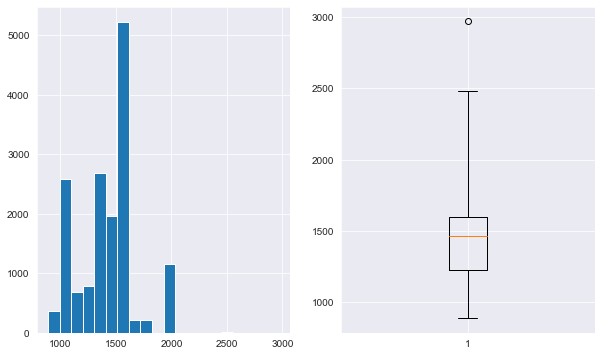

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.Displacement_cc, bins = 20)

plt.subplot(122)
plt.boxplot(df.Displacement_cc, whis = 2.5)

plt.show()

# Nr_of_Doors          

In [28]:
df["Nr. of Doors"].value_counts(dropna = False)

5.0    11787
4.0     3079
3.0      832
2.0      219
7.0        1
1.0        1
Name: Nr. of Doors, dtype: int64

In [29]:
df["Nr. of Doors"].replace([1, 7], np.nan, inplace=True)

In [30]:
df["Nr. of Doors"].value_counts(dropna = False)

5.0    11787
4.0     3079
3.0      832
2.0      219
NaN        2
Name: Nr. of Doors, dtype: int64

In [31]:
fill(df, "make_model", "body_type", "Nr. of Doors", "mode")

Number of NaN :  0
------------------
5.0    11789
4.0     3079
3.0      832
2.0      219
Name: Nr. of Doors, dtype: int64


<AxesSubplot:>

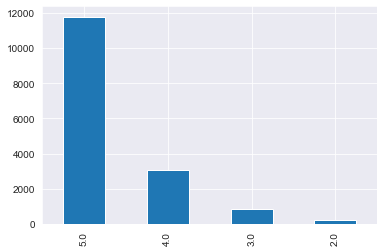

In [32]:
df["Nr. of Doors"].value_counts(dropna = False).plot.bar()

<AxesSubplot:xlabel='make_model,Nr. of Doors'>

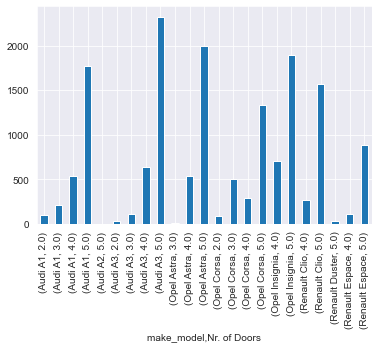

In [35]:
df.groupby(["make_model", "Nr. of Doors"])["Nr. of Doors"].count().plot.bar()

In [37]:
df.drop("Nr. of Doors", axis=1, inplace=True)

# Nr_of_Seats          

In [38]:
df.Nr_of_Seats.value_counts(dropna = False)

5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64

In [ ]:
df.Nr_of_Seats.replace([3, 6], np.nan, inplace=True)

In [39]:
df.Nr_of_Seats.value_counts(dropna = False)

5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64

In [40]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.0    14308
4.0     1127
7.0      362
2.0      119
6.0        2
3.0        1
Name: Nr_of_Seats, dtype: int64


<AxesSubplot:>

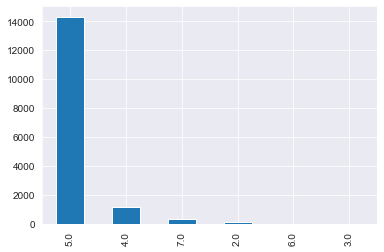

In [41]:
df.Nr_of_Seats.value_counts(dropna = False).plot.bar()

<AxesSubplot:xlabel='make_model,Nr_of_Seats'>

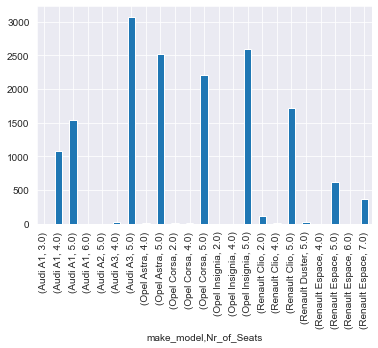

In [42]:
df.groupby(["make_model", "Nr_of_Seats"]).Nr_of_Seats.count().plot.bar()

In [43]:
df.drop("Nr_of_Seats", axis=1, inplace=True)

# Weight_kg            

In [44]:
df.Weight_kg.describe()

count    15919.000000
mean      1337.432251
std        200.466210
min          1.000000
25%       1165.000000
50%       1295.000000
75%       1472.000000
max       2471.000000
Name: Weight_kg, dtype: float64

In [45]:
df["Weight_kg"].sort_values().head(10)

8355       1.0
12779      1.0
1143     102.0
8857     840.0
14313    900.0
13513    977.0
13555    977.0
14654    980.0
14105    980.0
13999    980.0
Name: Weight_kg, dtype: float64

In [46]:
df["Weight_kg"].replace([1, 102], np.nan, inplace = True)

In [47]:
df["Weight_kg"].isnull().sum()

3

In [58]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.0    1583
1360.0    1419
1487.0     967
1135.0     837
1425.0     744
1180.0     695
1273.0     656
1165.0     603
1503.0     561
1734.0     556
1087.0     291
1335.0     242
1365.0     211
1199.0     205
1350.0     156
1119.0     153
1355.0     136
1280.0     127
1260.0     127
1275.0     112
1278.0     110
1255.0     108
1200.0     107
1522.0     103
1659.0     102
1195.0      96
1120.0      93
1403.0      91
1701.0      87
1250.0      85
1685.0      83
1441.0      82
1308.0      80
1285.0      80
1110.0      75
1613.0      75
1279.0      72
1364.0      70
1345.0      67
1733.0      65
1071.0      64
1209.0      64
1325.0      64
1141.0      64
1230.0      63
1845.0      56
1090.0      54
1052.0      53
1664.0      52
1154.0      52
1513.0      51
1065.0      50
1237.0      49
1205.0      46
1088.0      46
1440.0      46
1265.0      45
1395.0      44
1666.0      43
1585.0      43
1162.0      42
1134.0      42
1288.0      40
1393.0      40
12

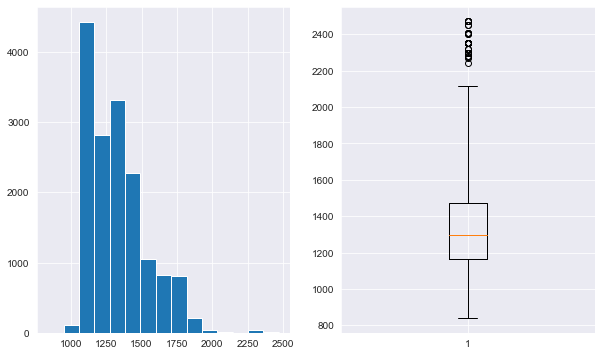

In [49]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.Weight_kg, bins=15)

plt.subplot(122)
plt.boxplot(df.Weight_kg, whis=2.5)

plt.show()

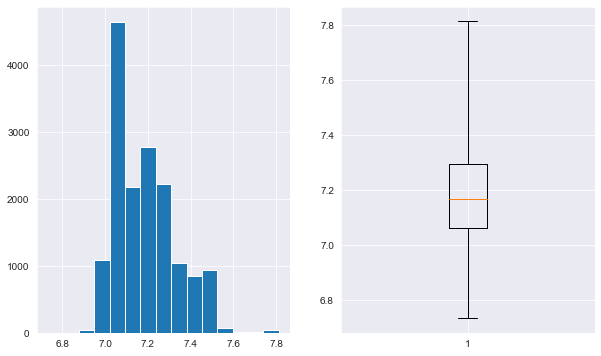

In [59]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.Weight_kg), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.Weight_kg), whis=2.5)

plt.show()

# hp_kW                

In [51]:
df.hp_kW.describe()

count    15919.000000
mean        88.373893
std         26.844440
min          1.000000
25%         66.000000
50%         85.000000
75%        101.000000
max        294.000000
Name: hp_kW, dtype: float64

In [52]:
df.hp_kW.sort_values().head(50)

6034      1.0
6946      1.0
7014      1.0
9285      1.0
9287      1.0
6005      1.0
9288      1.0
7018      1.0
9289      1.0
9290      1.0
9292      1.0
9299      1.0
10610     1.0
10580     1.0
10579     1.0
10468     1.0
15155     1.0
15156     1.0
7019      1.0
7016      1.0
13885     4.0
3913      9.0
8857     40.0
13759    40.0
8408     44.0
10282    51.0
10283    51.0
10284    51.0
10285    51.0
10286    51.0
10287    51.0
9145     51.0
10288    51.0
10346    51.0
10281    51.0
10330    51.0
9026     51.0
9025     51.0
10342    51.0
10289    51.0
9159     51.0
9384     51.0
9158     51.0
10290    51.0
10291    51.0
10345    51.0
10280    51.0
10279    51.0
10278    51.0
10264    51.0
Name: hp_kW, dtype: float64

In [53]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137.,   9., 133.,  77., 101.,  78., 103.,
         1.,  74., 118.,  84.,  88.,  80.,  76., 149.,  51.,  44.,  55.,
        52.,  63.,  40.,  65.,  75., 125., 120., 184., 239., 121., 143.,
       191.,  89., 195., 127., 122., 154., 155., 104., 123., 146.,  90.,
        56.,  53.,  54., 164.,   4., 163.,  57., 119., 165., 117., 115.,
        98., 168., 167.])

In [54]:
df.hp_kW.loc[df.hp_kW < 40] = np.nan

In [55]:
df.hp_kW.isnull().sum()

22

In [56]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.0     2544
66.0     2124
81.0     1403
100.0    1317
110.0    1117
70.0      890
125.0     715
51.0      703
55.0      589
118.0     552
92.0      466
121.0     392
147.0     380
77.0      353
56.0      295
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
65.0        4
76.0        4
98.0        3
80.0        3
93.0        3
149.0       3
168.0       3
40.0        2
86.0        2
53.0        2
228.0       2
167.0       2
143.0       2
150.0       2
63.0        2
140.0       2
89.0        2
127.0       2
270.0       2
239.0       1
44.0        1
195.0     

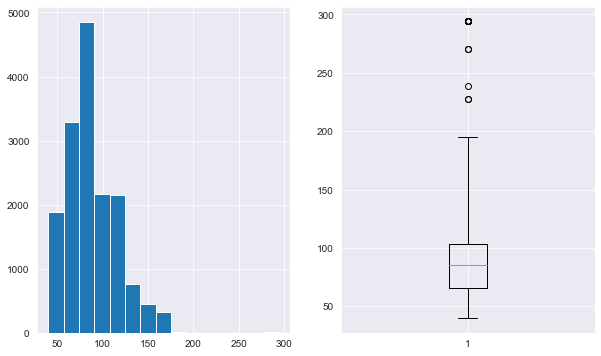

In [57]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(df.hp_kW, bins=15)

plt.subplot(122)
plt.boxplot(df.hp_kW, whis=2.5)

plt.show()

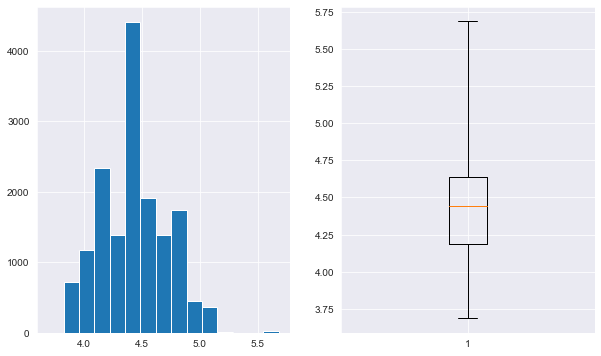

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(121)
plt.hist(np.log(df.hp_kW), bins=15)

plt.subplot(122)
plt.boxplot(np.log(df.hp_kW), whis=2.5)

plt.show()

# price                

In [60]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [61]:
df.price.sort_values().head(5)

8594      13
8828     120
6066     255
8829     331
8827    4950
Name: price, dtype: int64

In [62]:
df.drop(index = [8594, 8828, 6066,8829], axis = 0, inplace = True)

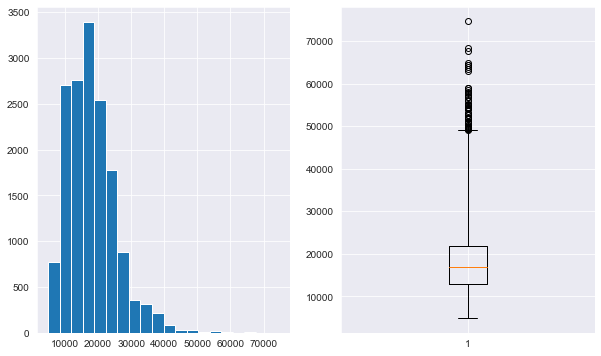

In [63]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(df.price, bins=20)

plt.subplot(122)
plt.boxplot(df.price, whis=3)

plt.show()

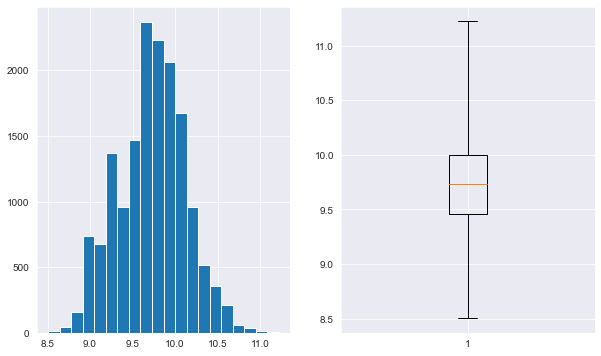

In [64]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.price), bins=20)

plt.subplot(122)
plt.boxplot(np.log(df.price), whis=2.3)

plt.show()

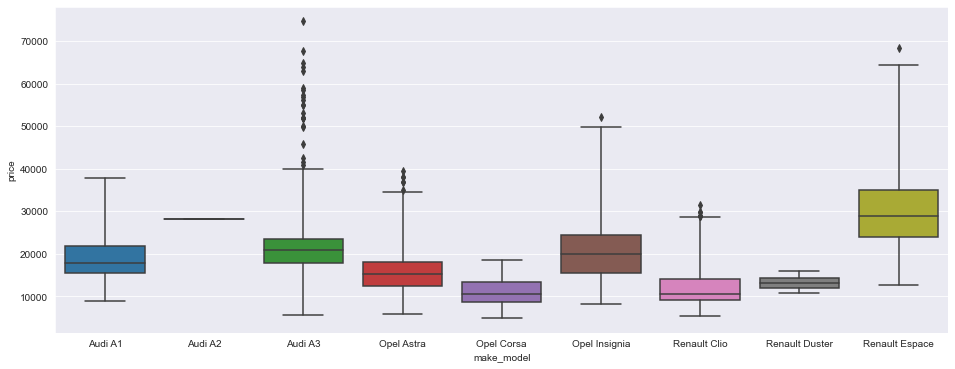

In [65]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

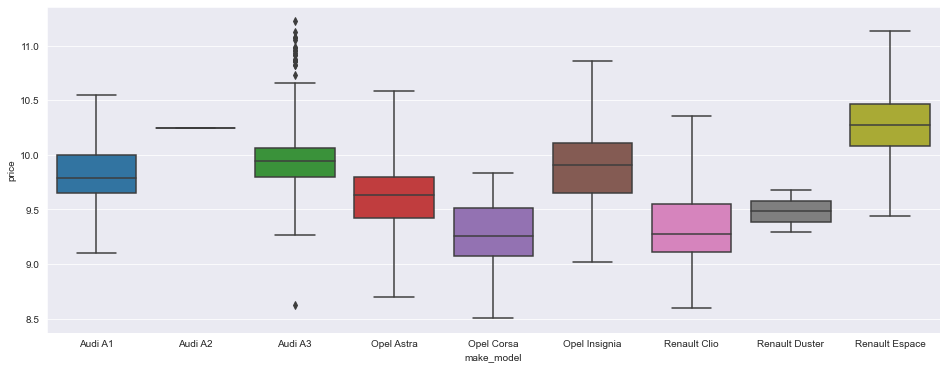

In [66]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y=np.log(df.price), data=df, whis=2.3)
plt.show()

In [67]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.0,80000.0,83450.0
Type,Used,Used,Used
Paint Type,\nMetallic\n,\nMetallic\n,\nMetallic\n
Gearing Type,"['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']","['\n', 'Automatic', '\n']"
Fuel,Diesel,Benzine,Diesel
Comfort_Convenience,"Air conditioning,Armrest,Automatic climate con...","Air conditioning,Automatic climate control,Hil...","Air conditioning,Cruise control,Electrical sid..."


In [68]:
numeric_col = "price,km,Gears,Previous_Owners,Cons_Comb,Displacement_cc,age,hp_kW,Weight_kg".split(",")

In [69]:
df_num = df[numeric_col]

In [70]:
df_num

,price,km,Gears,Previous_Owners,Cons_Comb,Displacement_cc,age,hp_kW,Weight_kg
0,15770,56013.000000,7.0,2.0,3.8,1422.0,3.0,66.0,1220.0
1,14500,80000.000000,7.0,1.0,5.6,1798.0,2.0,141.0,1255.0
2,14640,83450.000000,7.0,1.0,3.8,1598.0,3.0,85.0,1135.0
3,14500,73000.000000,6.0,1.0,3.8,1422.0,3.0,66.0,1195.0
4,16790,16200.000000,7.0,1.0,4.1,1422.0,3.0,66.0,1135.0
...,...,...,...,...,...,...,...,...,...
15914,39950,1647.362609,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0
15915,39885,9900.000000,7.0,1.0,7.4,1798.0,0.0,165.0,1708.0
15916,39875,15.000000,6.0,1.0,5.3,1997.0,0.0,146.0,1734.0
15917,39700,10.000000,6.0,1.0,5.3,1997.0,0.0,147.0,1758.0


<AxesSubplot:>

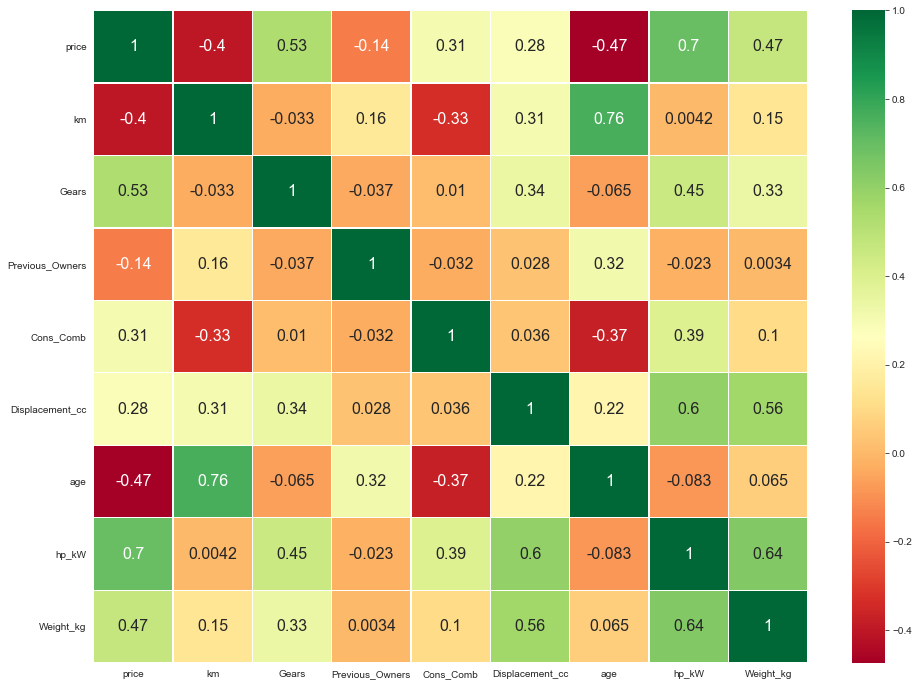

In [71]:
plt.figure(figsize = (16,12))
sns.heatmap(df_num.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 16})

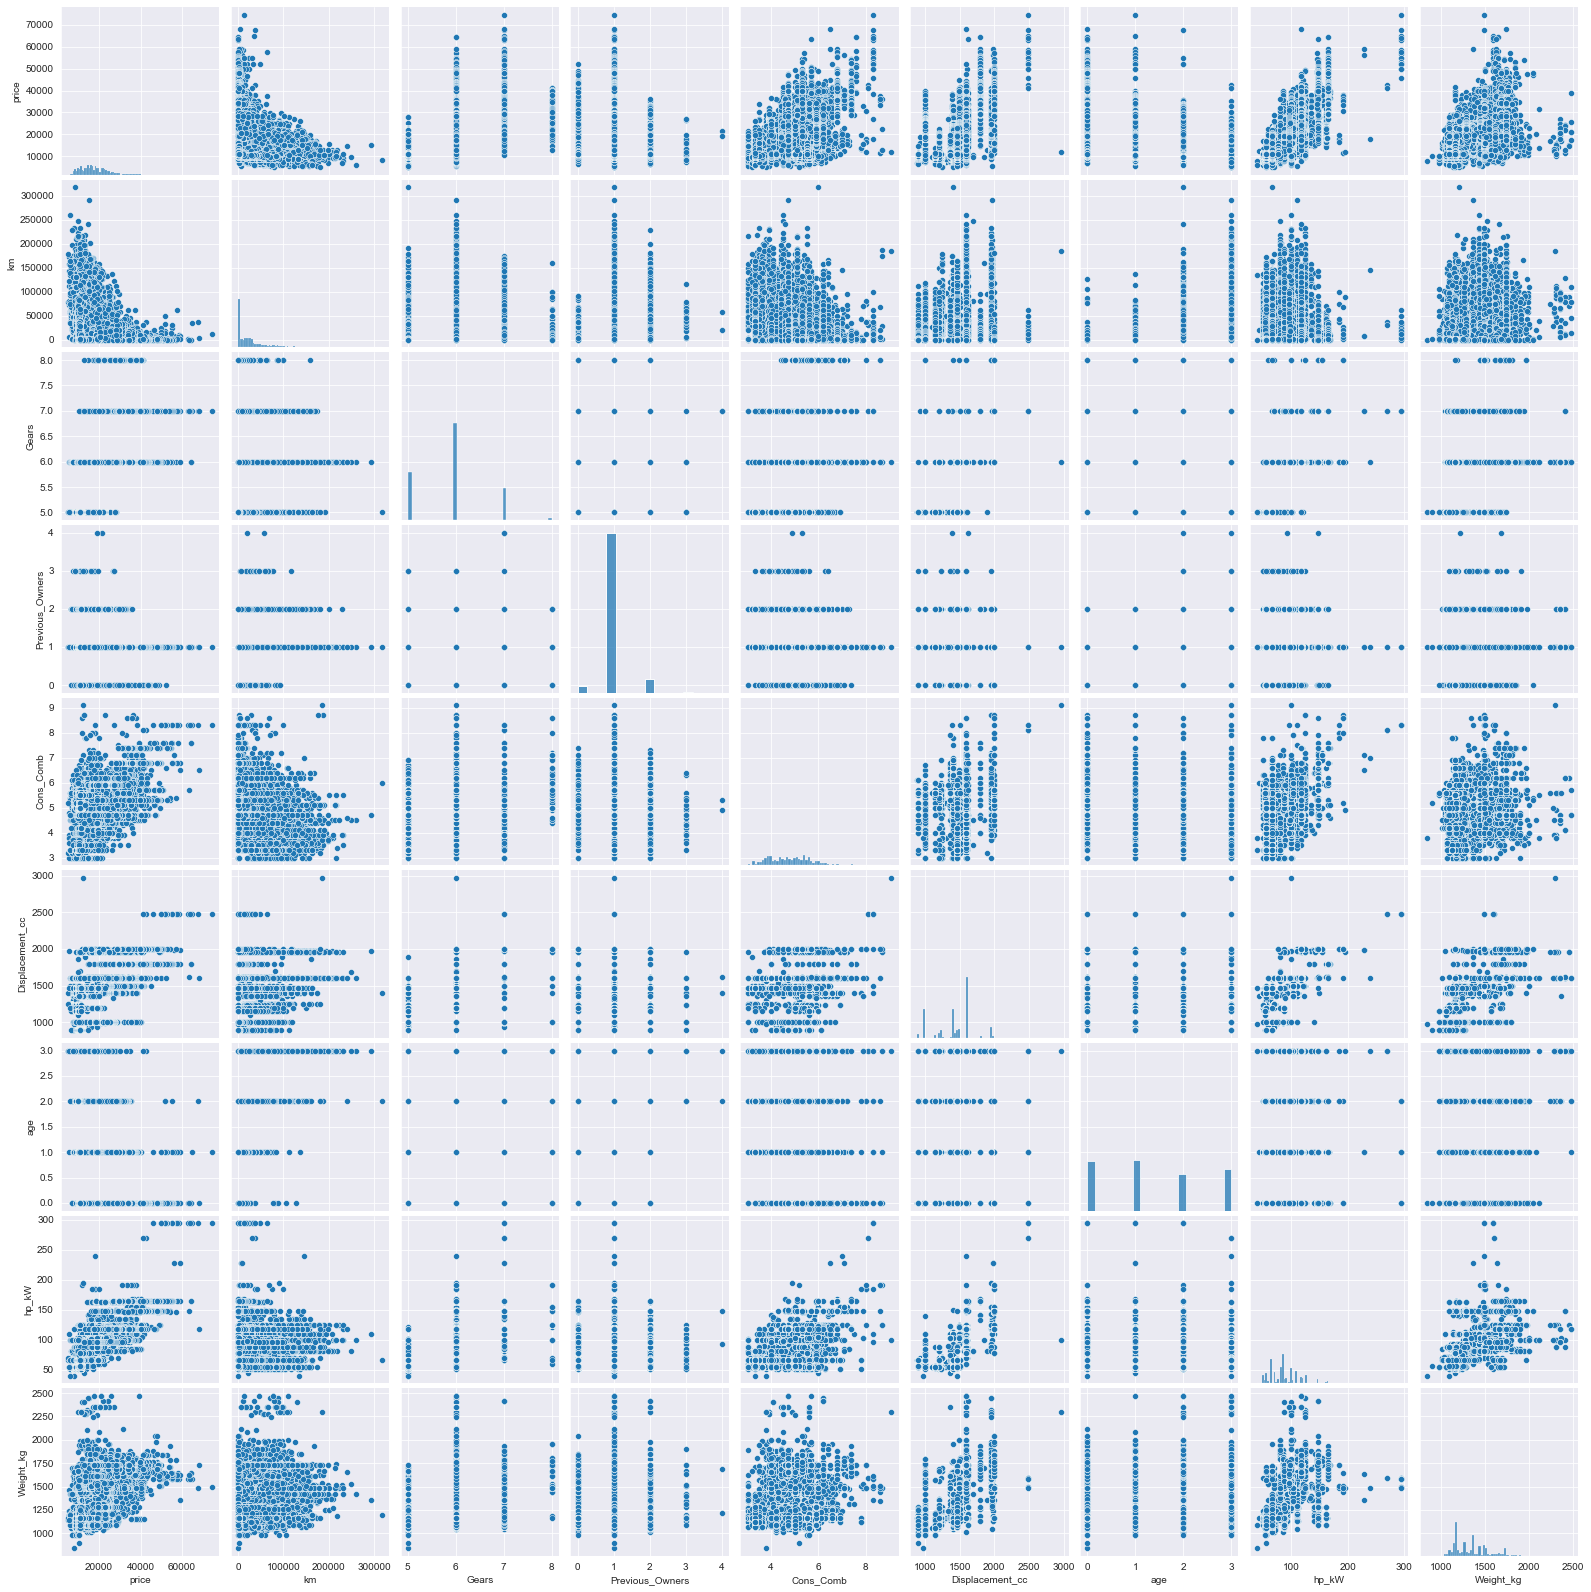

In [72]:
sns.pairplot(df_num, size = 2.5)
plt.show()

# Dummy

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15915 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Paint Type           15915 non-null  object 
 7   Gearing Type         15915 non-null  object 
 8   Fuel                 15915 non-null  object 
 9   Comfort_Convenience  15915 non-null  object 
 10  Entertainment_Media  15915 non-null  object 
 11  Extras               15915 non-null  object 
 12  Safety_Security      15915 non-null  object 
 13  Gears                15915 non-null  float64
 14  age                  15915 non-null  float64
 15  Previous_Owners      15915 non-null 

In [74]:
df.shape

(15915, 23)

In [75]:
df.to_csv("scout_car_not_dummy_finished.csv", index=False)

In [76]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [77]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [78]:
df.shape

(15915, 113)

In [79]:
df_final = pd.get_dummies(df)

In [80]:
df_final.shape

(15915, 143)

In [81]:
df_final.head().T

,0,1,2,3,4
price,15770.0,14500.0,14640.0,14500.0,16790.0
km,56013.0,80000.0,83450.0,73000.0,16200.0
Gears,7.0,7.0,7.0,6.0,7.0
age,3.0,2.0,3.0,3.0,3.0
Previous_Owners,2.0,1.0,1.0,1.0,1.0
hp_kW,66.0,141.0,85.0,66.0,66.0
Inspection_new,1.0,0.0,0.0,0.0,1.0
Displacement_cc,1422.0,1798.0,1598.0,1422.0,1422.0
Weight_kg,1220.0,1255.0,1135.0,1195.0,1135.0
Cons_Comb,3.8,5.6,3.8,3.8,4.1


In [82]:
df_final.to_csv("scout_car_dummy_finished.csv", index=False)